# Performing the EDA

#### Task done

1. Plotting the distribution of font vectors obtaiend over 388K entries pdfs to see if there is an intersting seperation

2. visualizing randomly sampled points say 600 when the dim reduction was fit on the full dataset to see any visual clues

* PCA
* TSNE
* MDS
* UMAP
* Autoencoders

**Algorithms like UMAP, TSNE and AutoEncoders can take a while to run**
 

In [17]:
import pandas as pd

df = pd.read_csv("/Users/mv96/Desktop/dataset_tkb/test.csv")

print(df.columns)

Index(['Unnamed: 0', 'Unnamed: 0.1', 'page_no', 'top_left', 'bot_right',
       'grobid_text', 'pdf_alto_text', 'fonts', 'label', 'Normal',
       'Superscipt', 'Subscript', 'italics', 'bold', 'is_Proportional',
       'is_Serif', 'font_color_red', 'font_color_green', 'font_color_blue',
       'is_bold_manual', 'is_italic_manual', 'is_serif_manual',
       'is_math_manual', 'new_font_size', 'pdf_path'],
      dtype='object')


In [18]:
# filter out everything that startswith unnamed
cols_list = list(filter(lambda x: not x.startswith("Unnamed"), list(df.columns)))
font_vectors = df[cols_list].iloc[:, 7:-1]
labels = df["label"]

In [19]:
font_vectors.describe()

,Normal,Superscipt,Subscript,italics,bold,is_Proportional,is_Serif,font_color_red,font_color_green,font_color_blue,is_bold_manual,is_italic_manual,is_serif_manual,is_math_manual,new_font_size
count,388519.000000,388519.000000,388519.000000,388519.000000,388519.000000,388519.000000,388519.000000,388519.000000,388519.000000,388519.000000,388519.000000,388519.000000,388519.000000,388519.000000,388519.000000
mean,0.905200,0.027543,0.049060,0.017119,0.002733,0.970726,0.000311,0.000459,0.000361,0.000445,0.178836,0.212708,0.269140,0.069849,0.259846
std,0.129627,0.053105,0.069949,0.087168,0.028547,0.155933,0.015420,0.009692,0.007635,0.009782,0.331913,0.235538,0.383401,0.102905,0.021880
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.862745,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013580,0.000000,0.000000,0.247830
50%,0.947368,0.000000,0.017857,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.139425,0.009091,0.030556,0.264786
75%,1.000000,0.034799,0.077193,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.103874,0.315789,0.633333,0.100000,0.272725
max,1.000000,1.000000,0.854342,1.000000,1.000000,1.000000,1.000000,0.997099,0.780882,1.000000,1.000000,1.000000,1.000000,1.000000,0.619675


In [20]:
print(font_vectors.shape, labels.shape)

(388809, 15) (388809,)


In [21]:
# plotting correlation of the font features with the label
combined = pd.concat([font_vectors, labels], axis=1)
combined.shape

(388809, 16)

In [22]:
# removing nan values
combined = combined.dropna()
combined.shape

(388519, 16)

In [23]:
# class imbalance in the data
combined["label"].value_counts()

basic      196935
proof      123740
theorem     67844
Name: label, dtype: int64

In [24]:
# source- https://stackoverflow.com/questions/44114463/stratified-sampling-in-pandas
def stratified_sample_df(df, col, n_samples):
    n = min(n_samples, df[col].value_counts().min())
    df_ = df.groupby(col).apply(lambda x: x.sample(n))
    df_.index = df_.index.droplevel(0)
    return df_


df_sample = stratified_sample_df(combined, "label", 200)
df_sample["label"].value_counts()

basic      200
proof      200
theorem    200
Name: label, dtype: int64

In [25]:
# make two versions of the data
X_big = combined.iloc[:, :-1]

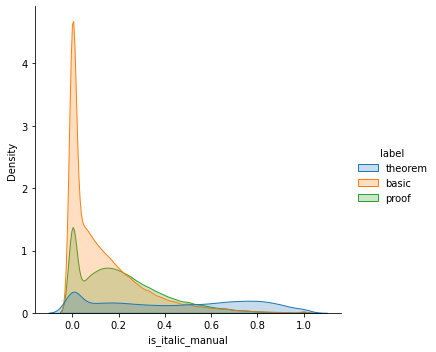

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(combined, x="is_italic_manual", hue="label", kind="kde", fill=True)

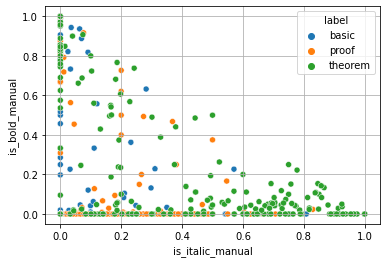

In [30]:
sns.scatterplot(data=df_sample, x="is_italic_manual", y="is_bold_manual", hue="label")
plt.grid()

# PCA

In [32]:
import numpy as np
from sklearn.decomposition import PCA

X = df_sample.iloc[:, :-1].reset_index(drop=True)
labels = df_sample.iloc[:, -1].to_frame().reset_index(drop=True)
print(X.shape, labels.shape)

pca = PCA(n_components=3, random_state=1).fit(X_big)
X_transformed = pca.transform(X)


print(X_transformed.shape)

# explaination from pca
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
#

pca_df = pd.DataFrame(X_transformed, columns=["PCA_1", "PCA_2", "PCA_3"])
print(pca_df.shape, labels.shape)

(600, 15) (600, 1)
(600, 3)
[0.61341658 0.13106589 0.09585144]
[301.5060051  139.36799438 119.18388209]
(600, 3) (600, 1)


In [33]:
pca_new = pd.concat([pca_df, labels], axis=1)

pca_new.columns

Index(['PCA_1', 'PCA_2', 'PCA_3', 'label'], dtype='object')

In [34]:
pca_new

,PCA_1,PCA_2,PCA_3,label
0,-0.266157,-0.305139,0.002172,basic
1,0.815233,-0.060070,-0.122419,basic
2,0.486366,-0.090320,0.545902,basic
3,-0.280619,-0.240381,-0.006208,basic
4,-0.327228,-0.015933,-0.023974,basic
...,...,...,...,...
595,0.883709,0.100114,-0.067874,theorem
596,1.103691,-0.030797,-0.183978,theorem
597,-0.297369,-0.172945,-0.021644,theorem
598,-0.255103,-0.257183,-0.009852,theorem


In [39]:
pca_new = pd.concat([pca_df, labels], axis=1)

import plotly.express as px

fig = px.scatter_3d(
    pca_new, x="PCA_1", y="PCA_2", z="PCA_3", symbol="label", color="label"
)
fig.show()

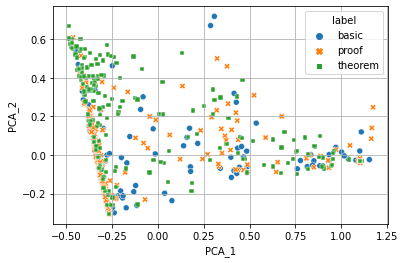

<Figure size 432x288 with 0 Axes>

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=pca_new, x="PCA_1", y="PCA_2", hue="label", style="label")
plt.grid()  # just add this
plt.show()
plt.savefig("pca.png")

In [41]:
# research the pca plot variation of variance explained in each dimension

# TSNE visualizations

In [42]:
# tsne sklearn

In [43]:
from sklearn.manifold import TSNE
import time

tick = time.time()
X_transformed = TSNE(
    n_components=3, n_jobs=4, random_state=1, perplexity=32, n_iter=10000, verbose=4
).fit_transform(X)
tock = time.time()
print("execution time in sec:{}".format(tock - tick))

labels = df_sample.iloc[:, -1].to_frame().reset_index(drop=True)
print(X_transformed.shape)

tsne_df = pd.DataFrame(X_transformed)
tsne_df.shape

/Users/mv96/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/mv96/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 97 nearest neighbors...
[t-SNE] Indexed 600 samples in 0.001s...
[t-SNE] Computed neighbors for 600 samples in 0.053s...
[t-SNE] Computed conditional probabilities for sample 600 / 600
[t-SNE] Mean sigma: 0.056076
[t-SNE] Computed conditional probabilities in 0.013s
[t-SNE] Iteration 50: error = 60.7456932, gradient norm = 0.3351333 (50 iterations in 0.173s)
[t-SNE] Iteration 100: error = 62.9432220, gradient norm = 0.2982456 (50 iterations in 0.134s)
[t-SNE] Iteration 150: error = 65.0897217, gradient norm = 0.2929205 (50 iterations in 0.150s)
[t-SNE] Iteration 200: error = 67.7014771, gradient norm = 0.2940546 (50 iterations in 0.139s)
[t-SNE] Iteration 250: error = 70.1132965, gradient norm = 0.2823880 (50 iterations in 0.151s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.113297
[t-SNE] Iteration 300: error = 1.4028237, gradient norm = 0.0009727 (50 iterations in 0.164s)
[t-SNE] Iteration 350: error = 1.2224511, gradient norm = 0.0012243 (

(600, 3)

In [44]:
tsne_new = pd.concat([tsne_df, labels], axis=1)
tsne_new.columns = ["tsne_1", "tsne_2", "tsne_3", "labels"]
tsne_new.columns

Index(['tsne_1', 'tsne_2', 'tsne_3', 'labels'], dtype='object')

In [45]:
tsne_new

,tsne_1,tsne_2,tsne_3,labels
0,29.679525,-74.493835,84.571518,basic
1,40.444981,42.695648,88.334610,basic
2,136.564026,35.907635,-35.894474,basic
3,-7.940131,-106.014542,19.414812,basic
4,-13.511067,-22.484493,-75.700455,basic
...,...,...,...,...
595,52.795376,6.959901,102.575523,theorem
596,-18.291021,50.223103,164.330750,theorem
597,-33.533897,-105.830383,-17.858829,theorem
598,39.894325,-112.751755,20.915508,theorem


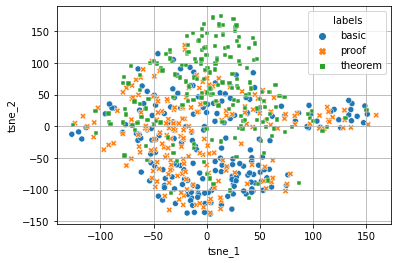

In [46]:
sns.scatterplot(data=tsne_new, x="tsne_1", y="tsne_2", hue="labels", style="labels")
plt.grid()  # just add this
plt.show()

In [47]:
tsne_new = pd.concat([tsne_new, labels], axis=1)

import plotly.express as px

fig = px.scatter_3d(
    tsne_new, x="tsne_1", y="tsne_2", z="tsne_3", symbol="label", color="label"
)
fig.show()

# MDS visualization

In [48]:
from sklearn.manifold import MDS
import time

tick = time.time()
embedding = MDS(n_components=3, max_iter=4000, verbose=1)
X_transformed = embedding.fit_transform(X)
tock = time.time()

print(tock - tick)
X_transformed.shape

breaking at iteration 281 with stress 798.7285729250187
breaking at iteration 338 with stress 743.6257685247474
breaking at iteration 277 with stress 847.6466204089306
breaking at iteration 299 with stress 884.7342836713525
4.373473167419434


(600, 3)

In [49]:
mds_df = pd.DataFrame(X_transformed)
mds_df.shape

mds_new = pd.concat([mds_df, labels], axis=1)
mds_new.columns = ["mds_1", "mds_2", "mds_3", "labels"]
mds_new.columns

Index(['mds_1', 'mds_2', 'mds_3', 'labels'], dtype='object')

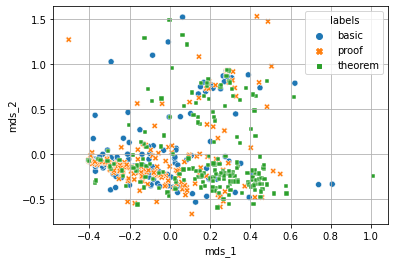

In [50]:
sns.scatterplot(data=mds_new, x="mds_1", y="mds_2", hue="labels", style="labels")
plt.grid()  # just add this
plt.show()

In [51]:
mds_new = pd.concat([mds_new, labels], axis=1)

import plotly.express as px

fig = px.scatter_3d(
    mds_new, x="mds_1", y="mds_2", z="mds_3", symbol="label", color="label"
)
fig.show()

# UMAP projection

In [52]:
import umap

reducer = umap.UMAP(n_neighbors=20, n_components=3, verbose=True)
X_transformed = reducer.fit_transform(X)
X_transformed.shape

ModuleNotFoundError: No module named 'umap'

In [ ]:
umap_df = pd.DataFrame(X_transformed)
umap_df.shape

umap_new = pd.concat([umap_df, labels], axis=1)
umap_new.columns = ["umap_1", "umap_2", "umap_3", "labels"]
umap_new

In [ ]:
umap_new

In [ ]:
sns.scatterplot(data=umap_new, x="umap_1", y="umap_2", hue="labels", style="labels")
plt.grid()  # just add this
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter_3d(
    umap_new, x="umap_1", y="umap_2", z="umap_3", symbol="labels", color="labels"
)
fig.show()